In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])

import matplotx
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["gpr_baseline"]["mean_absolute_error"],
        "max_error": loaded["gpr_baseline"]["max_error"],
        "mse": loaded["gpr_baseline"]["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [6]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count"]
)

In [7]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std"])

In [8]:
compiled_grouped_res

mae                 max_error            \
                                     mean       std count      mean       std   
representation num_train_points                                                 
inchi          10                1.437920       NaN     1  4.600000       NaN   
               50                1.181760  0.114081     5  4.214000  0.561364   
               100               1.085672  0.081901     5  4.096000  0.813744   
               200               1.073540  0.044853     4  4.392500  0.339055   
               500               0.995440  0.080995     4  4.125000  0.737812   
iupac_name     10                1.416728  0.563547     2  4.365000  0.091924   
               50                1.137780  0.051562     2  4.430000  0.042426   
               100               1.047600       NaN     1  3.630000       NaN   
               200               1.108240       NaN     1  3.900000       NaN   
               500               0.902720       NaN     1  3.910000       NaN   
selfies        10                1.038587  0.078144     3  3.916667  0.375278   
               50                1.168710  0.093445     4  4.487500  0.361421   
               100               1.051293  0.028275     3  3.643333  0.505206   
               200               1.046200  0.049667     2  3.865000  0.332340   
               500               1.025560  0.023589     2  4.115000  0.445477   
smiles         10                1.140880  0.251251     5  3.800000  0.354894   
               50                1.097257  0.052409     7  4.058571  0.494753   
               100               1.024411  0.023464     7  3.985714  0.311494   
               200               1.054669  0.094064     7  3.824286  0.321914   
               500               0.910973  0.054165     6  3.586667  0.357025   

                                            mse                  
                                count      mean       std count  
representation num_train_points                                  
inchi          10                   1  3.184414       NaN     1  
               50                   5  2.209326  0.380525     5  
               100                  5  1.869896  0.314177     5  
               200                  4  1.918404  0.128970     4  
               500                  4  1.658593  0.348872     4  
iupac_name     10                   2  3.065255  2.082825     2  
               50                   2  2.102268  0.191251     2  
               100                  1  1.645902       NaN     1  
               200                  1  1.924461       NaN     1  
               500                  1  1.354638       NaN     1  
selfies        10                   3  1.687330  0.338231     3  
               50                   4  2.205331  0.329119     4  
               100                  3  1.751300  0.019531     3  
               200                  2  1.758262  0.254772     2  
               500                  2  1.680527  0.102651     2  
smiles         10                   5  2.029157  0.961682     5  
               50                   7  1.931369  0.260953     7  
               100                  7  1.667006  0.074511     7  
               200                  7  1.810238  0.330768     7  
               500                  6  1.355500  0.169144     6

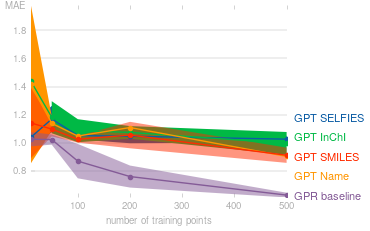

In [9]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1, 1)
    ax.plot(
        compiled_grouped_res.loc["selfies", :].index,
        compiled_grouped_res.loc["selfies", :]["mae"]["mean"],
        label="GPT SELFIES",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["selfies", :].index,
        compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
        - compiled_grouped_res.loc["selfies", :]["mae"]["std"],
        compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
        + compiled_grouped_res.loc["selfies", :]["mae"]["std"],
    )

    ax.plot(
        compiled_grouped_res.loc["inchi", :].index,
        compiled_grouped_res.loc["inchi", :]["mae"]["mean"],
        label="GPT InChI",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["inchi", :].index,
        compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
        - compiled_grouped_res.loc["inchi", :]["mae"]["std"],
        compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
        + compiled_grouped_res.loc["inchi", :]["mae"]["std"],
    )

    ax.plot(
        compiled_grouped_res.loc["iupac_name", :].index,
        compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"],
        label="GPT Name",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["iupac_name", :].index,
        compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"]
        - compiled_grouped_res.loc["iupac_name", :]["mae"]["std"],
        compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"]
        + compiled_grouped_res.loc["iupac_name", :]["mae"]["std"],
    )

    ax.plot(
        compiled_grouped_res.loc["smiles", :].index,
        compiled_grouped_res.loc["smiles", :]["mae"]["mean"],
        label="GPT SMILES",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["smiles", :].index,
        compiled_grouped_res.loc["smiles", :]["mae"]["mean"]
        - compiled_grouped_res.loc["smiles", :]["mae"]["std"],
        compiled_grouped_res.loc["smiles", :]["mae"]["mean"]
        + compiled_grouped_res.loc["smiles", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped["mae"]["mean"],
        label="GPR baseline",
        marker="o",
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["std"],
        compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["std"],
        alpha=0.5,
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel("number of training points", labelpad=4)
    matplotx.ylabel_top("MAE")
    # ax.set_xscale('log')

fig.savefig("lipophilicity_regression_res.pdf", bbox_inches="tight")